**PROBLEM STATEMENT**

An e-commerce company who acts as mediators between parties interested in selling and buying pre-owned cars. For year 2015-2016, they have recorded data about the seller and car including specification details, condition of car, seller details, registration details, web advertisement details, mark and model information, and price. Develop an algorithm to predict the price of the cars based on various attributes associated with the car.

**INTRODUCTION TO REGRESSION CASE STUDY**

* Data file name : cars_sample
* Data file type : csv
* Data set : (50000 x 13) Numerical-6,Categorical-13
* Method used : Regression technique 
* Problem statement : Develop an algorithm to predict the price of the cars based on various attributes associated with the car

**MODEL IDENTIFICATION**
* Linear regression
* Random forest

**REALIZATION OF SOLUTION**
* Assumption checks using regression diagnostics
* Evaluate performance metrics
* If assumptions are satisfied and solutions are acceptable then model is good
* If performance metrics are not reasonable then a single model is not able to capture the variation in price as a whole
* In such cases, it would be better to subset data and build seperate models

**IMPORTING THE REQUIRED PYTHON LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [2]:
# Setting dimensions for plot
sns.set(rc={"figure.figsize":(11.7,8.27)})

**IMPORTING DATA**

In [3]:
os.chdir("D:\VG\DATA SCIENCE\Data sets\Cars sampled")
cars_data=pd.read_table("cars_sampled.csv",sep=",")

In [4]:
# Creating a copy of the original data set
cars=cars_data.copy()

**EXPLORATORY DATA ANALYSIS**

In [5]:
# Structure of the dataset
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

In [6]:
# Summarizing data
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,5.000100e+04,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000
mean,6.559865e+03,2005.544229,116.496130,125613.687726,5.743725,50775.216696
std,8.581847e+04,122.991832,230.567709,40205.234483,3.711345,25743.701933
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1.150000e+03,1999.000000,69.000000,125000.000000,3.000000,30559.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49504.000000
75%,7.190000e+03,2008.000000,150.000000,150000.000000,9.000000,71404.000000
max,1.234568e+07,9999.000000,19312.000000,150000.000000,12.000000,99998.000000


In [7]:
pd.set_option("display.float_format",lambda x:"%3f"%x)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000
mean,6559.865463,2005.544229,116.496130,125613.687726,5.743725,50775.216696
std,85818.470097,122.991832,230.567709,40205.234483,3.711345,25743.701933
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1150.000000,1999.000000,69.000000,125000.000000,3.000000,30559.000000
50%,2950.000000,2003.000000,105.000000,150000.000000,6.000000,49504.000000
75%,7190.000000,2008.000000,150.000000,150000.000000,9.000000,71404.000000
max,12345678.000000,9999.000000,19312.000000,150000.000000,12.000000,99998.000000


In [8]:
# To display maximum set of columns
pd.set_option("display.max_columns",500)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000
mean,6559.865463,2005.544229,116.496130,125613.687726,5.743725,50775.216696
std,85818.470097,122.991832,230.567709,40205.234483,3.711345,25743.701933
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1150.000000,1999.000000,69.000000,125000.000000,3.000000,30559.000000
50%,2950.000000,2003.000000,105.000000,150000.000000,6.000000,49504.000000
75%,7190.000000,2008.000000,150.000000,150000.000000,9.000000,71404.000000
max,12345678.000000,9999.000000,19312.000000,150000.000000,12.000000,99998.000000


**DROPPING UNWANTED COLUMNS**

In [9]:
# Dropping unwanted columns
col=["name","dateCrawled","dateCreated","postalCode","lastSeen"]
cars=cars.drop(columns=col,axis=1)


In [10]:
# Removing duplicate records
cars.drop_duplicates(keep="first",inplace=True)

There was 470 duplicate records

**DATA CLEANING**

In [11]:
# Number of missing values in each column
cars.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5152
yearOfRegistration        0
gearbox                2765
powerPS                   0
model                  2730
kilometer                 0
monthOfRegistration       0
fuelType               4467
brand                     0
notRepairedDamage      9640
dtype: int64

26
38
AxesSubplot(0.125,0.125;0.775x0.755)


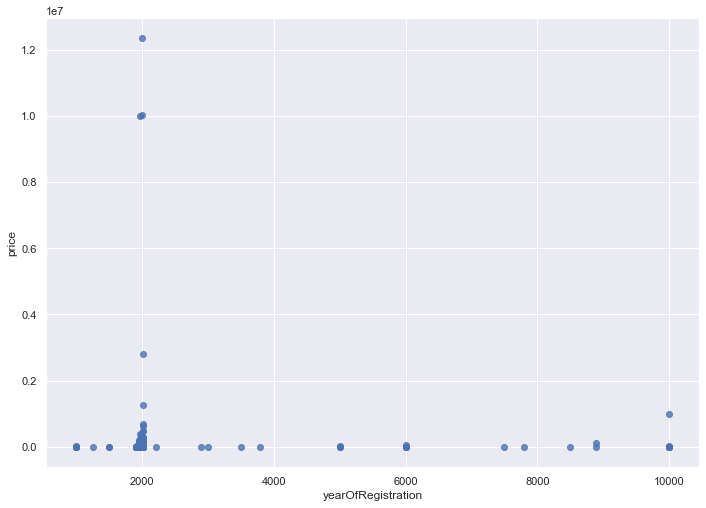

In [12]:
# Variable yearofRegistration
yearwise_count=cars["yearOfRegistration"].value_counts().sort_index()
print(sum(cars["yearOfRegistration"]> 2018))
print(sum(cars["yearOfRegistration"]<1950))
print(sns.regplot(x="yearOfRegistration",y="price",scatter=True,fit_reg=False,data=cars))
# Setting range of Year of Registration from 1950 to 2018

In [13]:
#Variable price
price_count=cars["price"].value_counts().sort_index()
print(price_count)

0           1415
1            172
2              1
3              1
5              4
            ... 
1250000        1
2795000        1
9999999        1
10010011       1
12345678       1
Name: price, Length: 2393, dtype: int64


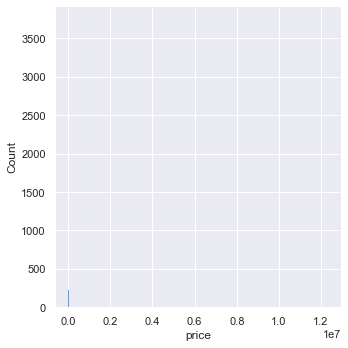

In [14]:
# Histogram of price 
sns.displot(cars["price"])

In [15]:
cars["price"].describe()

count      49531.000000
mean        6567.220206
std        86222.377730
min            0.000000
25%         1150.000000
50%         2950.000000
75%         7100.000000
max     12345678.000000
Name: price, dtype: float64

<AxesSubplot:ylabel='price'>

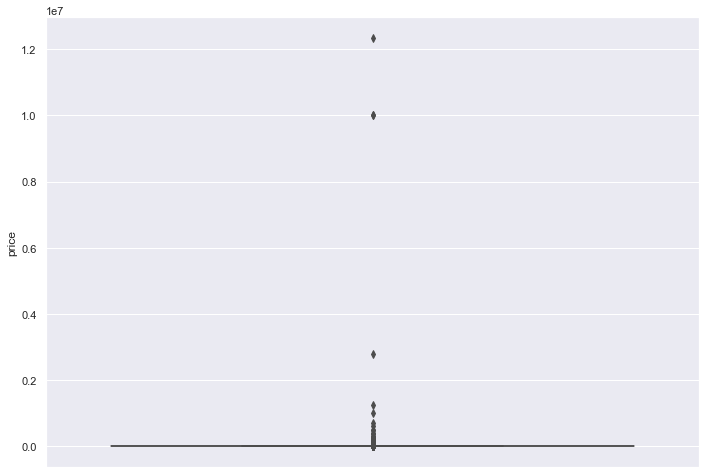

In [16]:
# Boxplot for price
sns.boxplot(y=cars["price"])


In [17]:
print(sum(cars["price"]>150000))
print(sum(cars["price"]<100))
# Setting range of Price between 100 and 150000

34
1748


In [18]:
# Variable powerPS
power_count=cars["powerPS"].value_counts().sort_index()
print(power_count)

0        5533
1           3
2           2
3           2
4           4
         ... 
15033       1
16011       1
16312       1
19211       1
19312       1
Name: powerPS, Length: 460, dtype: int64


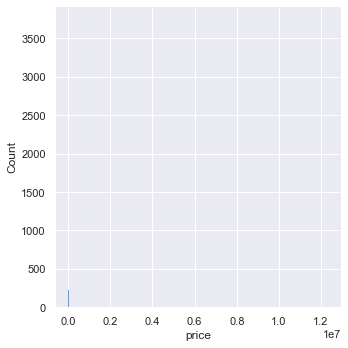

In [19]:
# Histogram for powerPS
sns.displot(cars["price"])

In [20]:
cars["powerPS"].describe()

count   49531.000000
mean      116.500515
std       231.535603
min         0.000000
25%        69.000000
50%       105.000000
75%       150.000000
max     19312.000000
Name: powerPS, dtype: float64

<AxesSubplot:ylabel='price'>

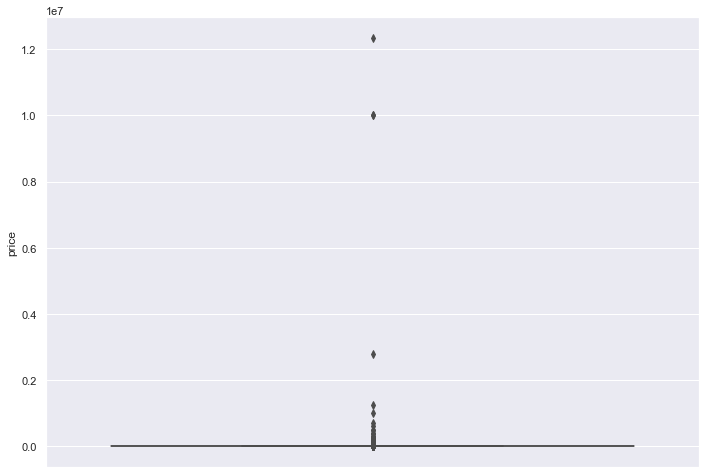

In [21]:
# Boxplot for PowerPS
sns.boxplot(y=cars["price"])

<AxesSubplot:xlabel='powerPS', ylabel='price'>

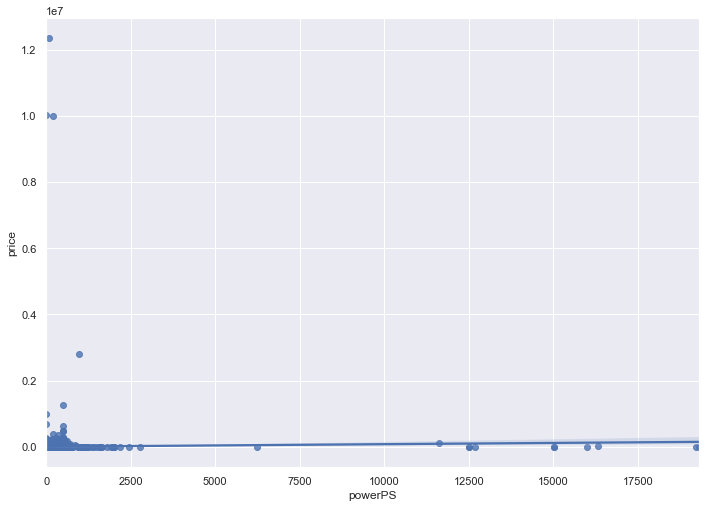

In [22]:
# Regression plot for PowerPS vs price
sns.regplot(x="powerPS",y="price",scatter=True,data=cars)

In [23]:
print(sum(cars["powerPS"]>500))
print(sum(cars["powerPS"]<10))
# Setting powerRS range to be between 10 and 500

115
5565


**SETTING WORKING RANGE FOR THE VARIABLES**

In [24]:
cars=cars[ (cars.yearOfRegistration<=2018) & (cars.yearOfRegistration>=1950) &
           (cars.price>=100) & (cars.price<=150000) &
           (cars.powerPS>=10) & (cars.powerPS<=500)]
# We have dropped 6700 records

In [25]:
# Combining Year of registration and month of registration 
cars["monthOfRegistration"]/=12

In [26]:
# Creating new variable Age by adding year and month of registration
cars["age"]=(2018-cars["yearOfRegistration"])+cars["monthOfRegistration"]
cars["age"]=round(cars["age"],2)
cars["age"].describe()

count   42772.000000
mean       14.872642
std         7.093125
min         0.000000
25%        10.330000
50%        14.830000
75%        19.170000
max        67.750000
Name: age, dtype: float64

In [27]:
cars=cars.drop(columns=["yearOfRegistration","monthOfRegistration"],axis=1)
cars.head(3)

,seller,offerType,price,abtest,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,age
0,private,offer,4450,test,limousine,manual,150,3er,150000,diesel,bmw,NaN,15.250000
1,private,offer,13299,control,suv,manual,163,xc_reihe,150000,diesel,volvo,no,13.500000
2,private,offer,3200,test,bus,manual,101,touran,150000,diesel,volkswagen,NaN,15.920000


**VISUALIZING PARAMETERS**

<AxesSubplot:xlabel='age', ylabel='age'>

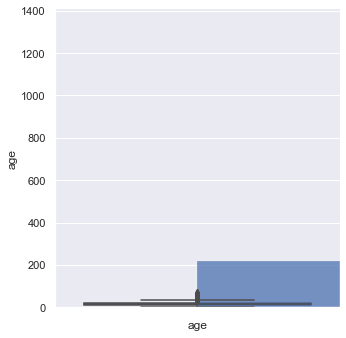

In [28]:
# Age
sns.displot(cars["age"])
sns.boxplot(y=cars["age"])

<AxesSubplot:xlabel='price', ylabel='price'>

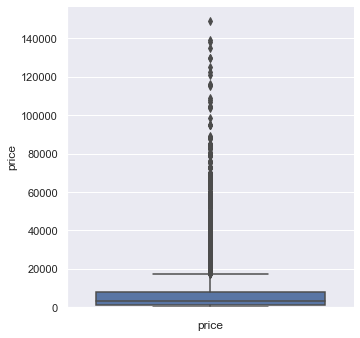

In [29]:
# Price
sns.displot(cars["price"])
sns.boxplot(y=cars["price"])

<AxesSubplot:xlabel='powerPS', ylabel='powerPS'>

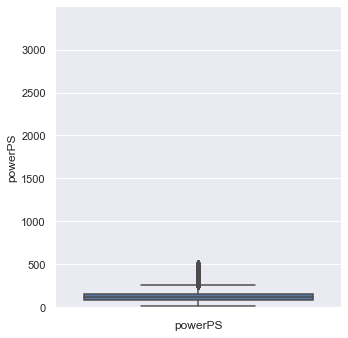

In [30]:
# PowerPS
sns.displot(cars["powerPS"])
sns.boxplot(y=cars["powerPS"])

**VISUALIZING PARAMETERS AFTER NARROWING WORKING RANGE**

<AxesSubplot:xlabel='age', ylabel='price'>

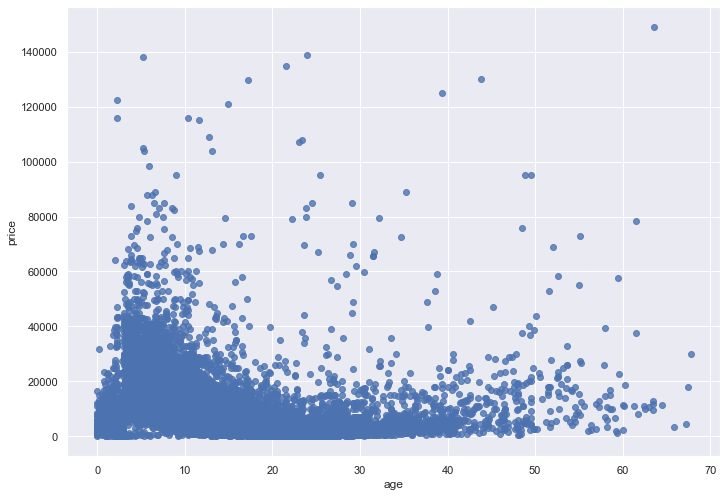

In [31]:
# Age vs Price
sns.regplot(x="age",y="price",scatter=True,fit_reg=False,data=cars)

**Insights from the above visualization:**

* Cars priced higher are newer
* With increase in age, price decreases
* However some cars are priced higher with increase in age
* With increase in power, price also increases

<AxesSubplot:xlabel='powerPS', ylabel='price'>

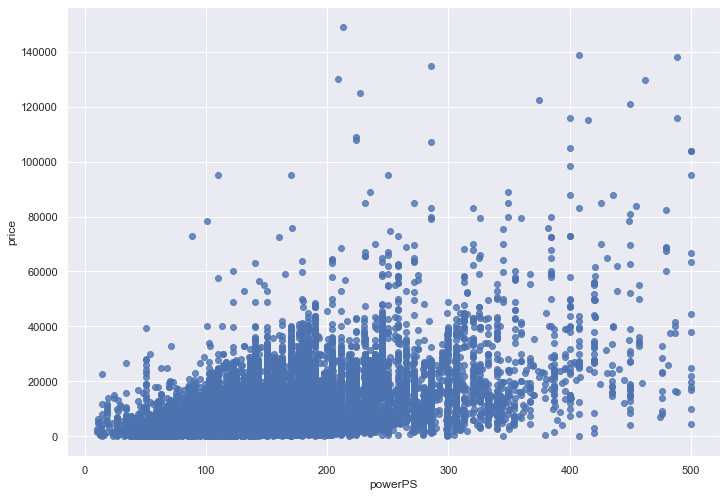

In [32]:
# PowerPS vs Price
sns.regplot(x="powerPS",y="price",scatter=True,fit_reg=False,data=cars)

In [33]:
# Variable seller
print(cars["seller"].value_counts())
pd.crosstab(cars["seller"],columns="count",normalize=True)

private       42771
commercial        1
Name: seller, dtype: int64


col_0,count
seller,
commercial,0.000023
private,0.999977


<AxesSubplot:xlabel='seller', ylabel='count'>

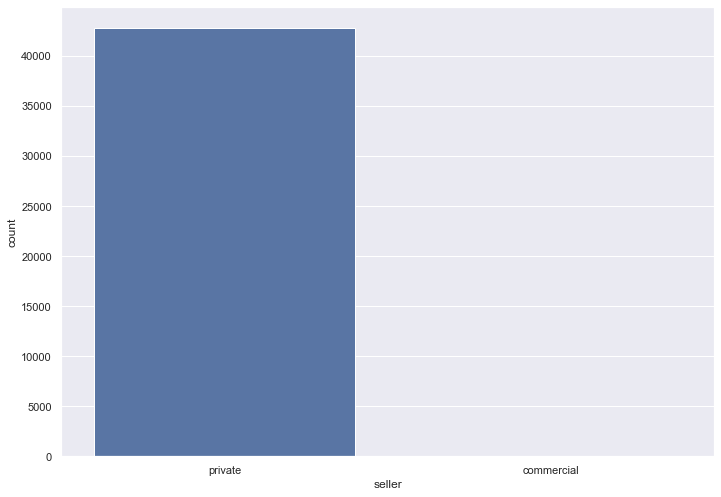

In [34]:
sns.countplot(x="seller",data=cars)

offer    42772
Name: offerType, dtype: int64


<AxesSubplot:xlabel='offerType', ylabel='count'>

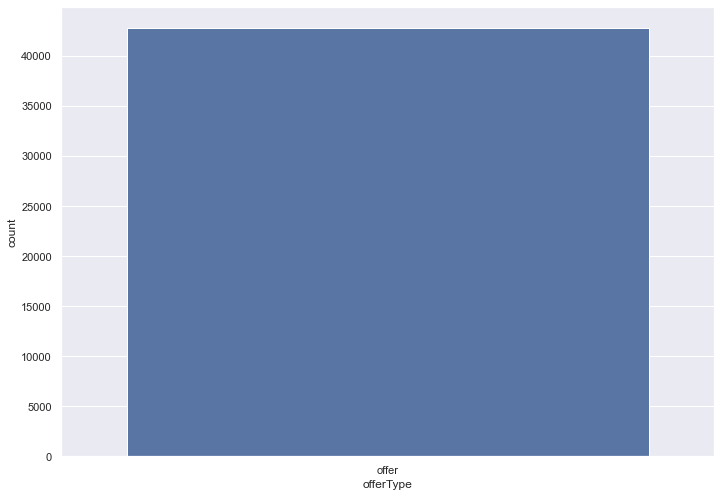

In [35]:
# Variable offertype
print(cars["offerType"].value_counts())
sns.countplot(x="offerType",data=cars)

In [36]:
# Varibale abtest
print(cars["abtest"].value_counts())
pd.crosstab(cars["abtest"],columns="count",normalize=True)

test       22128
control    20644
Name: abtest, dtype: int64


col_0,count
abtest,
control,0.482652
test,0.517348


<AxesSubplot:xlabel='abtest', ylabel='count'>

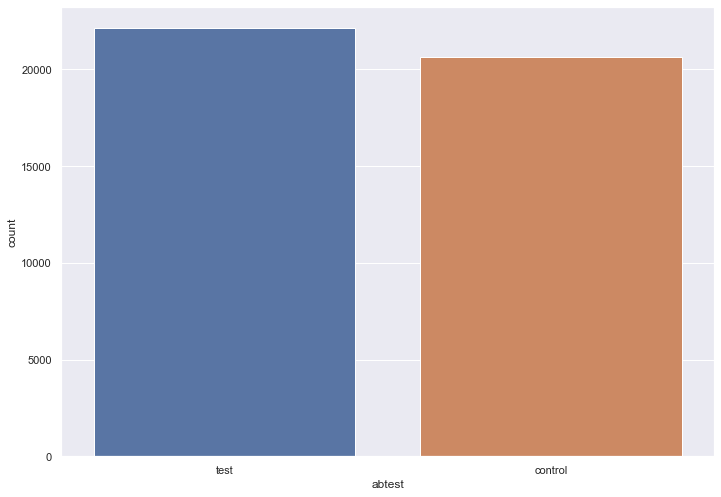

In [37]:
# Countplot for abtest
sns.countplot(x="abtest",data=cars)

<AxesSubplot:xlabel='abtest', ylabel='price'>

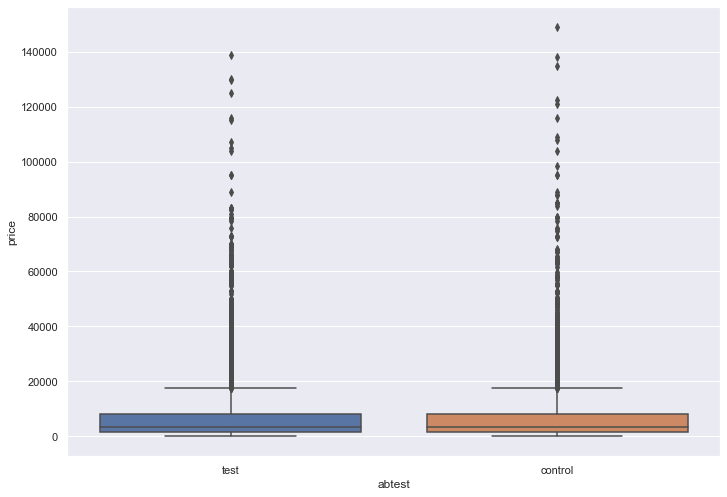

In [38]:
# Boxplot for abtest vs price
sns.boxplot(x="abtest",y="price",data=cars)

In [39]:
# Variable vehicleType
print(cars["vehicleType"].value_counts())
pd.crosstab(cars["vehicleType"],columns="count",normalize=True)

limousine        11746
small car         9285
station wagon     8076
bus               3597
cabrio            2792
coupe             2261
suv               1813
others             326
Name: vehicleType, dtype: int64


col_0,count
vehicleType,
bus,0.090159
cabrio,0.069982
coupe,0.056672
limousine,0.294415
others,0.008171
small car,0.232730
station wagon,0.202426
suv,0.045443


<AxesSubplot:xlabel='vehicleType', ylabel='count'>

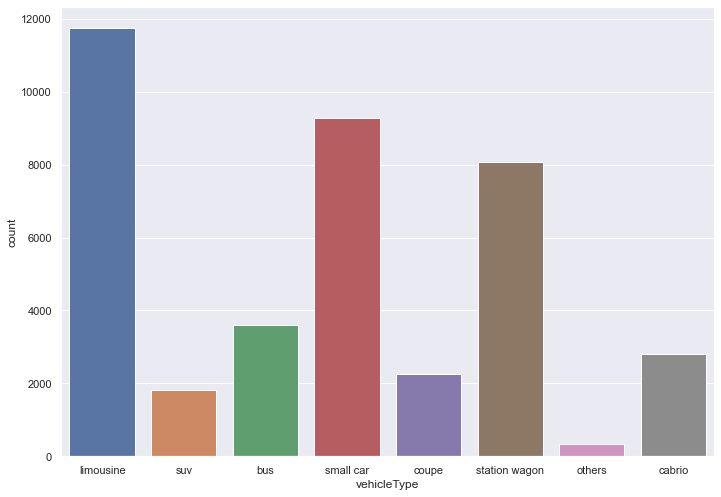

In [40]:
# Countplot for vehicle type
sns.countplot(x="vehicleType",data=cars)

<AxesSubplot:xlabel='vehicleType', ylabel='price'>

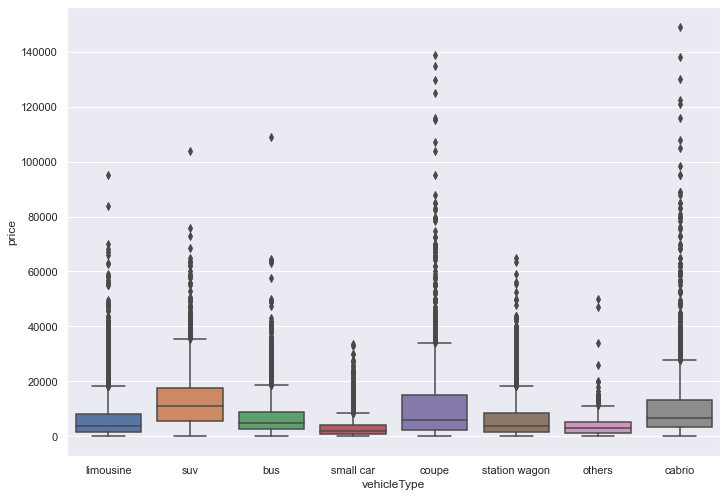

In [41]:
# Boxplot for vehicletype vs price
sns.boxplot(x="vehicleType",y="price",data=cars)

In [42]:
# Variable gearbox
print(cars["gearbox"].value_counts())
pd.crosstab(cars["gearbox"],columns="counts",normalize=True)

manual       32582
automatic     9396
Name: gearbox, dtype: int64


col_0,counts
gearbox,
automatic,0.223832
manual,0.776168


<AxesSubplot:xlabel='gearbox', ylabel='count'>

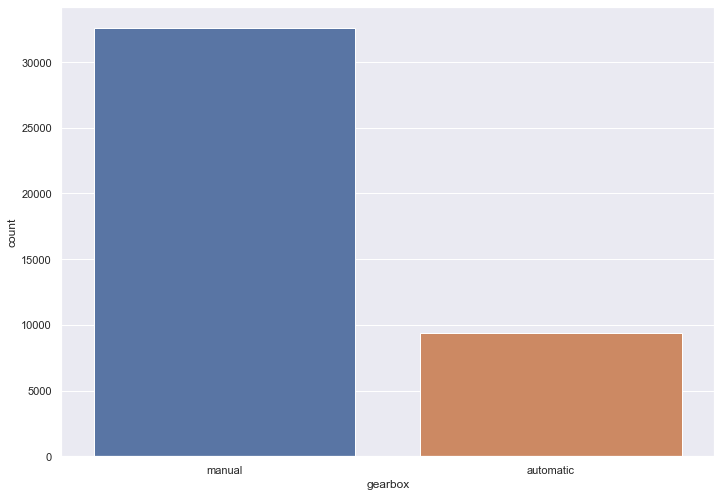

In [43]:
# Countplot for gearbox
sns.countplot(x="gearbox",data=cars)

<AxesSubplot:xlabel='gearbox', ylabel='price'>

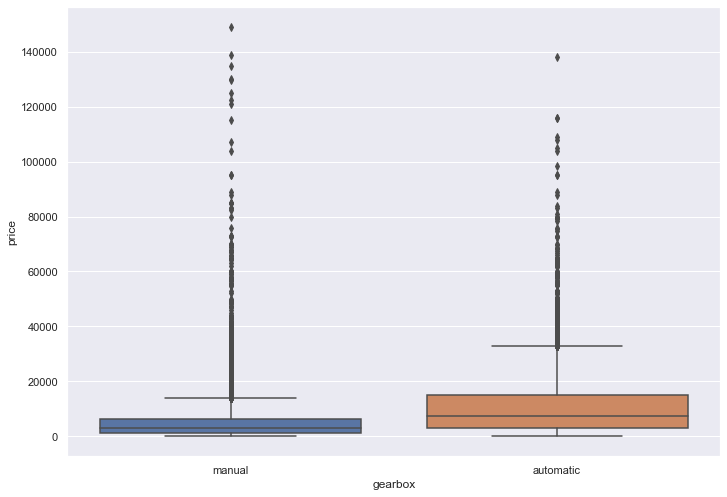

In [44]:
# Boxplot for gearbox vs price
sns.boxplot(x="gearbox",y="price",data=cars)

In [45]:
# Variable model
print(cars["model"].value_counts())
pd.crosstab(cars["model"],columns="count",normalize=True)

golf          3478
others        2900
3er           2482
polo          1500
corsa         1386
              ... 
charade          1
serie_3          1
200              1
rangerover       1
serie_2          1
Name: model, Length: 247, dtype: int64


col_0,count
model,
100,0.001144
145,0.000097
147,0.001412
156,0.001582
159,0.000462
...,...
yaris,0.003213
yeti,0.000657
ypsilon,0.000535


<AxesSubplot:xlabel='model', ylabel='count'>

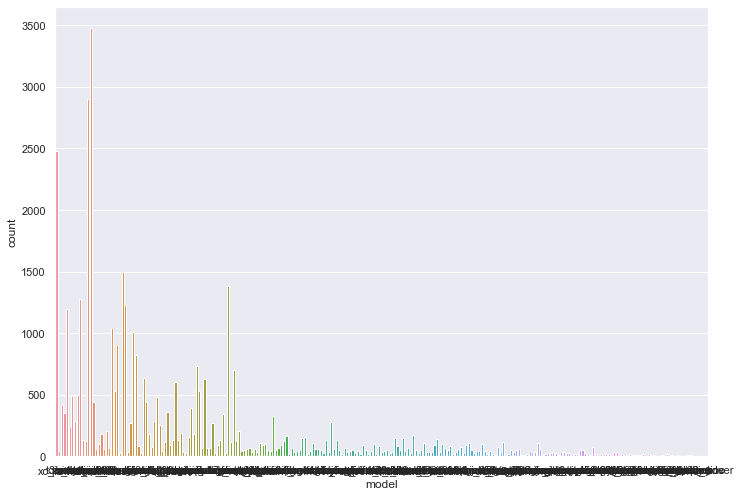

In [46]:
# Countplot for model
sns.countplot(x="model",data=cars)

<AxesSubplot:xlabel='model', ylabel='price'>

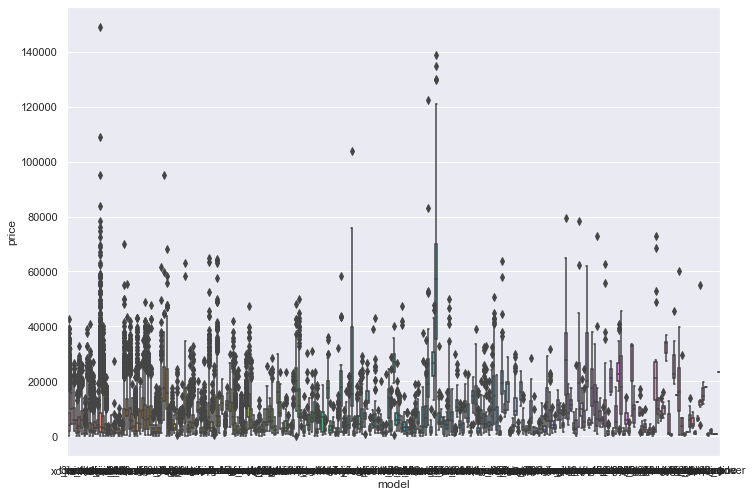

In [47]:
# Boxplot for models vs price
sns.boxplot(x="model",y="price",data=cars)

In [48]:
# Variable kilometer
print(cars["kilometer"].value_counts().sort_index())
pd.crosstab(cars["model"],columns="count",normalize=True)

5000        479
10000       207
20000       651
30000       712
40000       795
50000       932
60000      1101
70000      1182
80000      1378
90000      1484
100000     1824
125000     4597
150000    27430
Name: kilometer, dtype: int64


col_0,count
model,
100,0.001144
145,0.000097
147,0.001412
156,0.001582
159,0.000462
...,...
yaris,0.003213
yeti,0.000657
ypsilon,0.000535


<AxesSubplot:xlabel='kilometer', ylabel='count'>

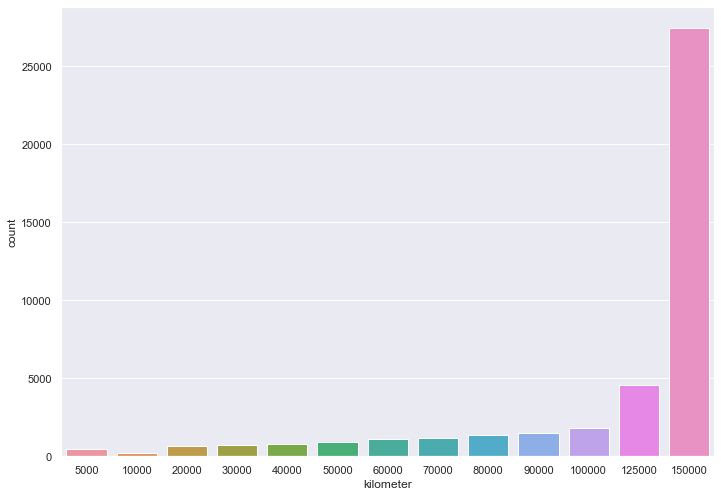

In [49]:
# Countplot for kilometer
sns.countplot(x="kilometer",data=cars)

<AxesSubplot:xlabel='kilometer', ylabel='price'>

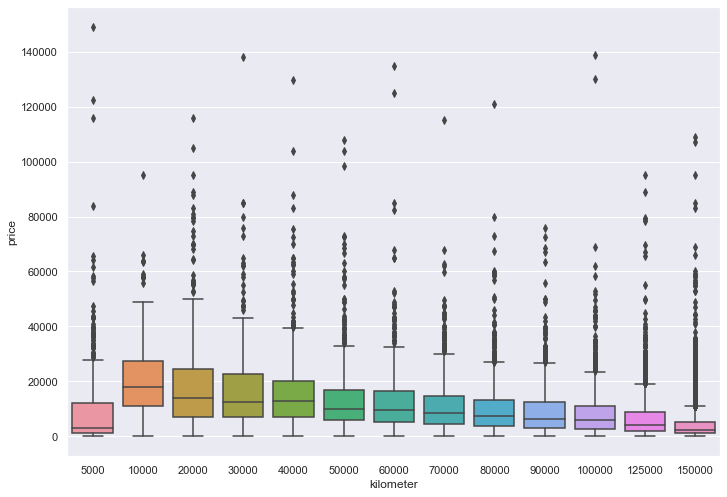

In [50]:
# Boxplot for kilometer vs price
sns.boxplot(x="kilometer",y="price",data=cars)

In [51]:
# Variable Fueltype
print(cars["fuelType"].value_counts())
pd.crosstab(cars["fuelType"],columns="count",normalize=True)

petrol     26509
diesel     12854
lpg          690
cng           70
hybrid        36
electro       10
other          6
Name: fuelType, dtype: int64


col_0,count
fuelType,
cng,0.001742
diesel,0.319950
electro,0.000249
hybrid,0.000896
lpg,0.017175
other,0.000149
petrol,0.659838


<AxesSubplot:xlabel='fuelType', ylabel='count'>

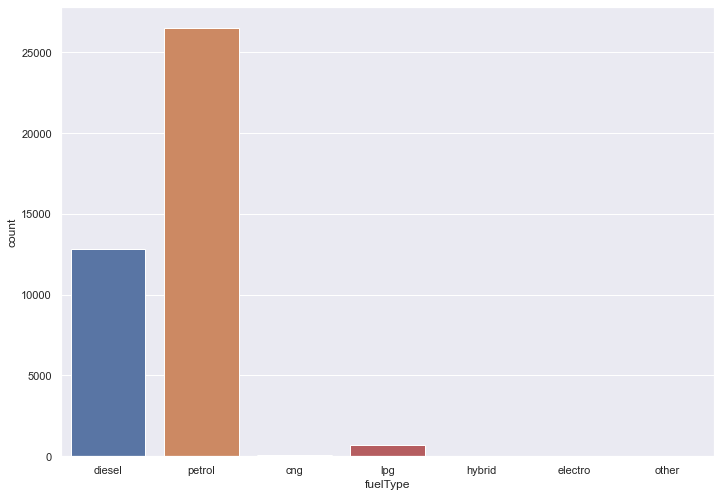

In [52]:
# Countplot for fueltype
sns.countplot(x="fuelType",data=cars)

<AxesSubplot:xlabel='fuelType', ylabel='price'>

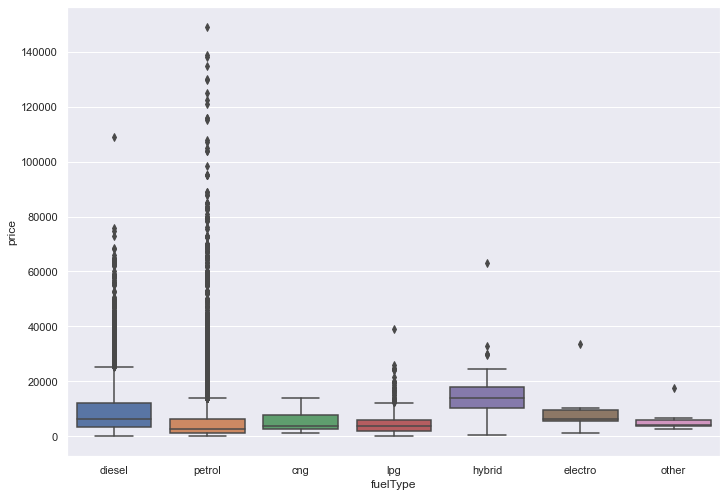

In [53]:
# Boxplot for fueltype vs price
sns.boxplot(x="fuelType",y="price",data=cars)

In [54]:
# Variable brand
print(cars["brand"].value_counts())
pd.crosstab(cars["brand"],columns="count",normalize=True)

volkswagen        9134
bmw               4868
opel              4487
mercedes_benz     4134
audi              3984
ford              2815
renault           1941
peugeot           1323
fiat               996
seat               886
skoda              698
mazda              663
smart              623
nissan             601
citroen            598
toyota             547
volvo              429
mini               428
hyundai            406
mitsubishi         359
honda              300
sonstige_autos     299
kia                276
suzuki             264
porsche            260
alfa_romeo         245
chevrolet          213
chrysler           151
dacia              123
subaru             112
jeep                91
land_rover          81
jaguar              78
daihatsu            67
saab                65
lancia              56
rover               53
daewoo              53
trabant             43
lada                22
Name: brand, dtype: int64


col_0,count
brand,
alfa_romeo,0.005728
audi,0.093145
bmw,0.113813
chevrolet,0.004980
chrysler,0.003530
citroen,0.013981
dacia,0.002876
daewoo,0.001239
daihatsu,0.001566


<AxesSubplot:xlabel='brand', ylabel='count'>

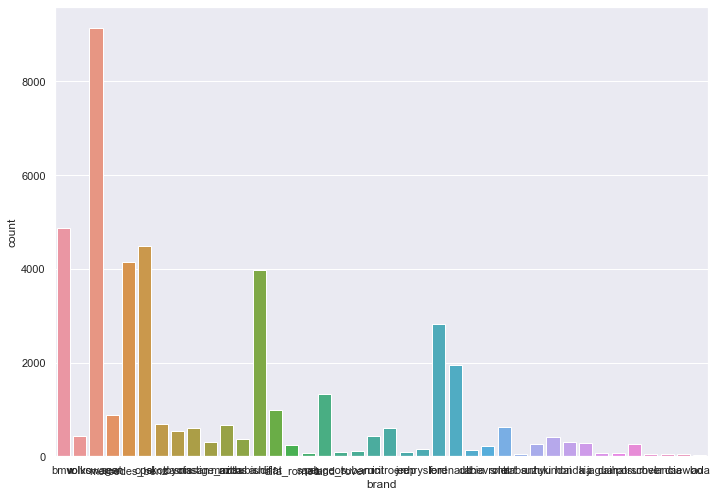

In [55]:
# Countplot for brand
sns.countplot(x="brand",data=cars)

<AxesSubplot:xlabel='brand', ylabel='price'>

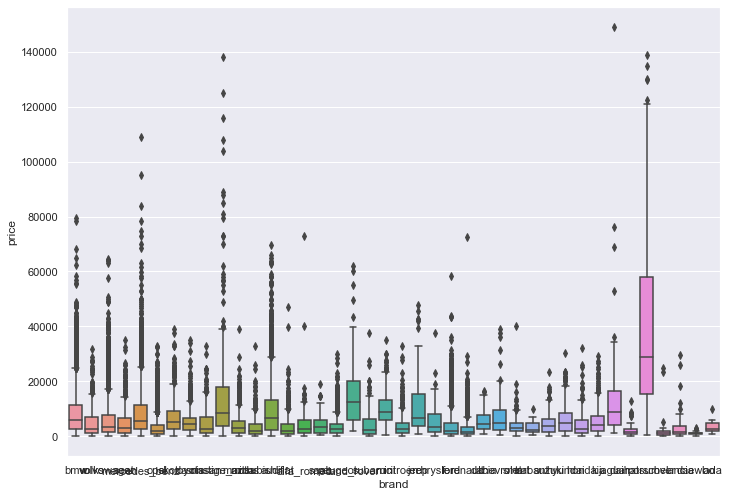

In [56]:
# Boxplot for brand vs price
sns.boxplot(x="brand",y="price",data=cars)

In [57]:
# Variable notRepairedDamage
print(cars["notRepairedDamage"].value_counts())
pd.crosstab(cars["notRepairedDamage"],columns="count",normalize=True)

no     32507
yes     3988
Name: notRepairedDamage, dtype: int64


col_0,count
notRepairedDamage,
no,0.890725
yes,0.109275


<AxesSubplot:xlabel='notRepairedDamage', ylabel='count'>

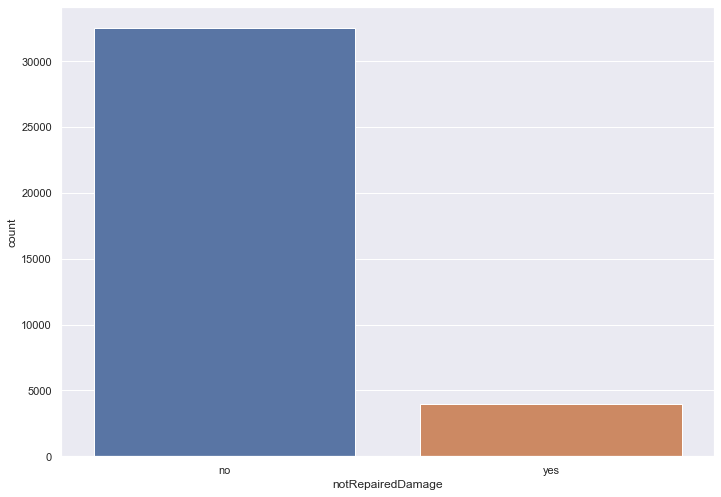

In [58]:
# Countplot for notRepairedDamage
sns.countplot(x="notRepairedDamage",data=cars)

<AxesSubplot:xlabel='notRepairedDamage', ylabel='price'>

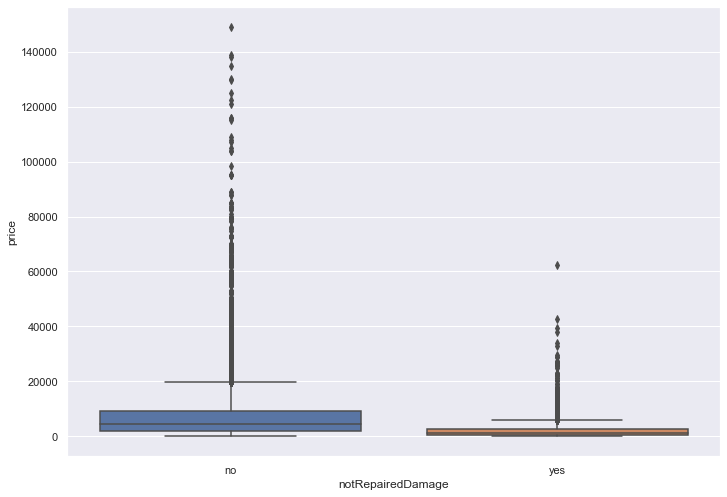

In [59]:
# Boxplot for notRepairedDamage vs price
sns.boxplot(x="notRepairedDamage",y="price",data=cars)

**Insights from the above visualization of each variable:**

* Seller            - Commercial is insignificant since 0.999 of the cars are Private
* OfferType         - Offer is insignificant as all the cars have offer
* abtest            - Test and control has equal distribution, and does not affect the price
* VehicleType       - Type of the vehicle affects the price
* Gearbox           - Manual(0.77) is priced lower when compared to Automatic(0.22)
* Model             - Cars are distributed over many models
* Kilometer         - Cars with less kilometers are sold for more price
* FuelType          - FuelType affects the price
* Brand             - Cars are distributed over many brands
* NotrepairedDamage - Cars in which damages are not rectified are coated for a lower price

**REMOVING INSIGNIFICANT VARIABLES**

In [60]:
col=["seller","offerType","abtest"]
cars=cars.drop(columns=col,axis=1)
cars2=cars.copy()
cars2.head(3)

,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,age
0,4450,limousine,manual,150,3er,150000,diesel,bmw,NaN,15.250000
1,13299,suv,manual,163,xc_reihe,150000,diesel,volvo,no,13.500000
2,3200,bus,manual,101,touran,150000,diesel,volkswagen,NaN,15.920000


**CORRELATION**

In [61]:
cars_select1=cars.select_dtypes(exclude=[object])
correlation1=cars_select1.corr()
round(correlation1,3)

,price,powerPS,kilometer,age
price,1.000000,0.575000,-0.440000,-0.336000
powerPS,0.575000,1.000000,-0.016000,-0.151000
kilometer,-0.440000,-0.016000,1.000000,0.292000
age,-0.336000,-0.151000,0.292000,1.000000


In [62]:
# Identifing the correlation between price vs (kilomter,age,powerPS)
cars_select1.corr().loc[:,"price"].abs().sort_values(ascending=False)[1:]

powerPS     0.575234
kilometer   0.440138
age         0.335821
Name: price, dtype: float64

**TYPES OF DATA SETS FOR THE MACHINE LEARNING MODELS**

We are going to build a Linear Regression and Random Forest model on two sets of data
* Dataset 1 - Data obtained by omitting rows with any missing values
* Dataset 2 - Data obtained by imputing the missing values

**OMITTING THE MISSING VALUES**

In [63]:
# Dropping null values
cars_omit=cars.dropna(axis=0)

In [64]:
# Converting catergorical variables to dummies
cars_omit=pd.get_dummies(cars_omit,drop_first=True)
cars_omit.head(3)

,price,powerPS,kilometer,age,vehicleType_cabrio,vehicleType_coupe,vehicleType_limousine,vehicleType_others,vehicleType_small car,vehicleType_station wagon,vehicleType_suv,gearbox_manual,model_147,model_156,model_159,model_1_reihe,model_1er,model_200,model_2_reihe,model_300c,model_3_reihe,model_3er,model_4_reihe,model_500,model_5_reihe,model_5er,model_601,model_6_reihe,model_6er,model_7er,model_80,model_850,model_90,model_900,model_9000,model_911,model_a1,model_a2,model_a3,model_a4,model_a5,model_a6,model_a8,model_a_klasse,model_accord,model_agila,model_alhambra,model_almera,model_altea,model_amarok,model_antara,model_arosa,model_astra,model_auris,model_avensis,model_aveo,model_aygo,model_b_klasse,model_b_max,model_beetle,model_berlingo,model_bora,model_boxster,model_bravo,model_c1,model_c2,model_c3,model_c4,model_c5,model_c_klasse,model_c_max,model_c_reihe,model_caddy,model_calibra,model_captiva,model_carisma,model_carnival,model_cayenne,model_cc,model_ceed,model_charade,model_cherokee,model_citigo,model_civic,model_cl,model_clio,model_clk,model_clubman,model_colt,model_combo,model_cooper,model_cordoba,model_corolla,model_corsa,model_cr_reihe,model_croma,model_crossfire,model_cuore,model_cx_reihe,model_defender,model_delta,model_discovery,model_doblo,model_ducato,model_duster,model_e_klasse,model_eos,model_escort,model_espace,model_exeo,model_fabia,model_fiesta,model_focus,model_forester,model_forfour,model_fortwo,model_fox,model_freelander,model_fusion,model_g_klasse,model_galant,model_galaxy,model_getz,model_gl,model_glk,model_golf,model_grand,model_i3,model_i_reihe,model_ibiza,model_impreza,model_insignia,model_jazz,model_jetta,model_jimny,model_juke,model_justy,model_ka,model_kadett,model_kaefer,model_kalina,model_kalos,model_kangoo,model_kuga,model_laguna,model_lancer,model_lanos,model_legacy,model_leon,model_lodgy,model_logan,model_lupo,model_lybra,model_m_klasse,model_m_reihe,model_materia,model_matiz,model_megane,model_meriva,model_micra,model_mii,model_modus,model_mondeo,model_move,model_musa,model_mustang,model_mx_reihe,model_navara,model_niva,model_note,model_nubira,model_octavia,model_omega,model_one,model_others,model_outlander,model_pajero,model_panda,model_passat,model_phaeton,model_picanto,model_polo,model_primera,model_ptcruiser,model_punto,model_q3,model_q5,model_q7,model_qashqai,model_r19,model_range_rover,model_range_rover_evoque,model_range_rover_sport,model_rangerover,model_rav,model_rio,model_roadster,model_roomster,model_rx_reihe,model_s60,model_s_klasse,model_s_max,model_s_type,model_sandero,model_santa,model_scenic,model_scirocco,model_seicento,model_serie_2,model_serie_3,model_sharan,model_signum,model_sirion,model_sl,model_slk,model_sorento,model_spark,model_spider,model_sportage,model_sprinter,model_stilo,model_superb,model_swift,model_terios,model_tigra,model_tiguan,model_toledo,model_touareg,model_touran,model_transit,model_transporter,model_tt,model_tucson,model_twingo,model_up,model_v40,model_v50,model_v60,model_v70,model_v_klasse,model_vectra,model_verso,model_viano,model_vito,model_vivaro,model_voyager,model_wrangler,model_x_reihe,model_x_trail,model_x_type,model_xc_reihe,model_yaris,model_yeti,model_ypsilon,model_z_reihe,model_zafira,fuelType_diesel,fuelType_electro,fuelType_hybrid,fuelType_lpg,fuelType_other,fuelType_petrol,brand_audi,brand_bmw,brand_chevrolet,brand_chrysler,brand_citroen,brand_dacia,brand_daewoo,brand_daihatsu,brand_fiat,brand_ford,brand_honda,brand_hyundai,brand_jaguar,brand_jeep,brand_kia,brand_lada,brand_lancia,brand_land_rover,brand_mazda,brand_mercedes_benz,brand_mini,brand_mitsubishi,brand_nissan,brand_opel,brand_peugeot,brand_porsche,brand_renault,brand_rover,brand_saab,brand_seat,brand_skoda,brand_smart,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,notRepairedDamage_yes
1,13299,163,150000,13.500000,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [65]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

**BUILDING MDDEL WITH OMITTED DATA**

In [66]:
# Separating input and output features
x1 = cars_omit.drop(['price'], axis='columns', inplace=False)
y1 = cars_omit['price']
print(x1)
print(y1)

       powerPS  kilometer       age  vehicleType_cabrio  vehicleType_coupe  \
1          163     150000 13.500000                   0                  0   
3           86      60000 13.000000                   0                  0   
4          185     150000 10.920000                   0                  0   
5           90     150000 23.170000                   0                  0   
7          136     150000 21.920000                   0                  1   
...        ...        ...       ...                 ...                ...   
49991      231     150000 14.670000                   0                  0   
49992       82     150000 20.750000                   0                  0   
49993       60     125000 19.670000                   0                  0   
49995      101     150000 17.250000                   0                  0   
50000       38     150000 12.830000                   0                  0   

       vehicleType_limousine  vehicleType_others  vehicleType_s

   1. Before  2. After
1      13299  9.495444
3       4500  8.411833


array([[<AxesSubplot:title={'center':'1. Before'}>,
        <AxesSubplot:title={'center':'2. After'}>]], dtype=object)

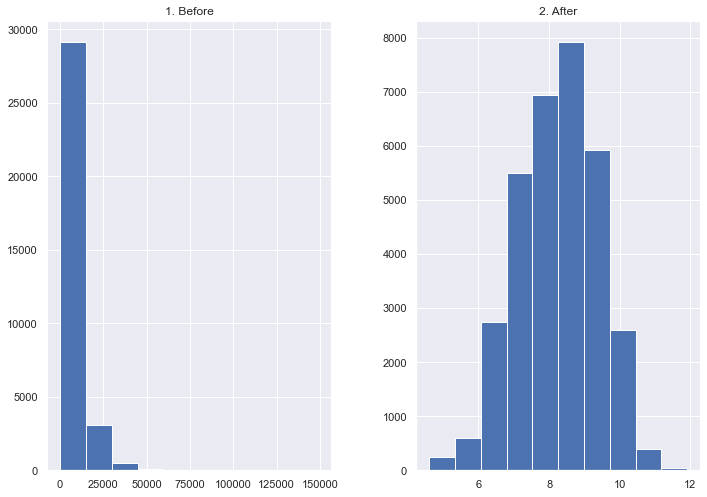

In [67]:
# Plotting the variable price
prices = pd.DataFrame({"1. Before":y1, "2. After":np.log(y1)})
print(prices.head(2))
prices.hist()

In [68]:
# Transforming price as a logarithmic value
y1 = np.log(y1)

In [69]:
# Splitting data into test and train
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state = 3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(23018, 300) (9866, 300) (23018,) (9866,)


**BASELINE MODEL FOR OMITTED DATA**

We are making a base model by using test data mean value.
This is to set a benchmark and to compare with our regression model.

In [70]:
# finding the mean for test data value
base_pred = np.mean(y_test)
print(base_pred)

8.249615787653337


In [71]:
# Repeating same value till length of test data
base_pred = np.repeat(base_pred, len(y_test))
print(base_pred)

[8.24961579 8.24961579 8.24961579 ... 8.24961579 8.24961579 8.24961579]


In [72]:
# finding the RMSE
base_root_mean_square_error = np.sqrt(mean_squared_error(y_test, base_pred))                               
print(base_root_mean_square_error)

1.1274483657478247


**LINEAR REGRESSION WITH OMITTED DATA**

In [73]:
# Setting intercept as true
lgr=LinearRegression(fit_intercept=True)

In [74]:
# Model
model_lin1=lgr.fit(X_train,y_train)

In [75]:
# Predicting model on test set
cars_predictions_lin1 = lgr.predict(X_test)

In [76]:
# Computing MSE and RMSE
lin_mse1 = mean_squared_error(y_test, cars_predictions_lin1)
lin_rmse1 = np.sqrt(lin_mse1)
print(lin_rmse1)

0.5455481266513831


In [77]:
# R squared value
r2_lin_test1=model_lin1.score(X_test,y_test)
r2_lin_train1=model_lin1.score(X_train,y_train)
print(r2_lin_test1,r2_lin_train1)

0.7658615091649252 0.7800936978183916


count   9866.000000
mean       0.003352
std        0.545565
min       -5.796435
25%       -0.260941
50%        0.041057
75%        0.301637
max        4.547147
Name: price, dtype: float64

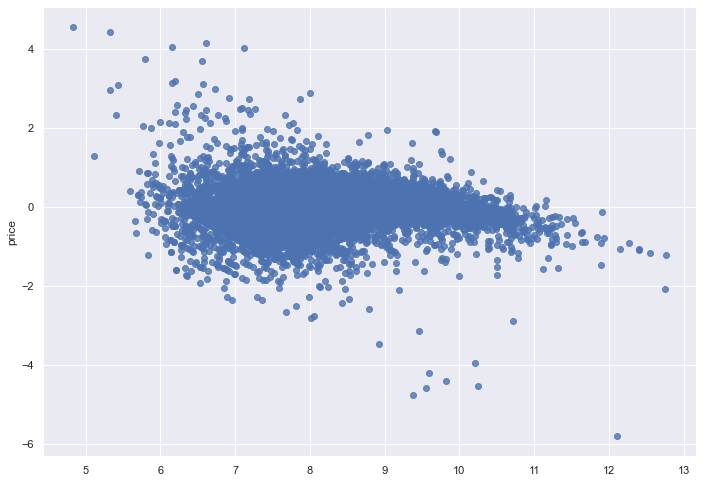

In [78]:
# Regression diagnostics- Residual plot analysis
residuals1=y_test-cars_predictions_lin1
sns.regplot(x=cars_predictions_lin1, y=residuals1, scatter=True, fit_reg=False)
residuals1.describe()

**RANDOM FOREST WITH OMITTED DATA**

In [79]:
# Model parameters
rf = RandomForestRegressor(n_estimators = 100,max_features='auto',max_depth=100,min_samples_split=10,min_samples_leaf=4,random_state=1)

In [80]:
# Model
model_rf1=rf.fit(X_train,y_train)

In [81]:
# Predicting model on test set
cars_predictions_rf1 = rf.predict(X_test)

In [82]:
# Computing MSE and RMSE
rf_mse1 = mean_squared_error(y_test, cars_predictions_rf1)
rf_rmse1 = np.sqrt(rf_mse1)
print(rf_rmse1)

0.4360736289370223


In [83]:
# R squared value
r2_rf_test1=model_rf1.score(X_test,y_test)
r2_rf_train1=model_rf1.score(X_train,y_train)
print(r2_rf_test1,r2_rf_train1)   

0.8504018147750623 0.9202494705146291


**MODEL BUILDING WITH IMPUTED DATA**

In [84]:
cars_imputed = cars.apply(lambda x:x.fillna(x.median()) if x.dtype=='float' else x.fillna(x.value_counts().index[0]))
cars_imputed.isnull().sum()

price                0
vehicleType          0
gearbox              0
powerPS              0
model                0
kilometer            0
fuelType             0
brand                0
notRepairedDamage    0
age                  0
dtype: int64

In [85]:
# Converting categorical variables to dummy variables
cars_imputed=pd.get_dummies(cars_imputed,drop_first=True)

In [86]:
# Separating input and output feature
x2 = cars_imputed.drop(['price'], axis='columns', inplace=False)
y2 = cars_imputed['price']

array([[<AxesSubplot:title={'center':'1. Before'}>,
        <AxesSubplot:title={'center':'2. After'}>]], dtype=object)

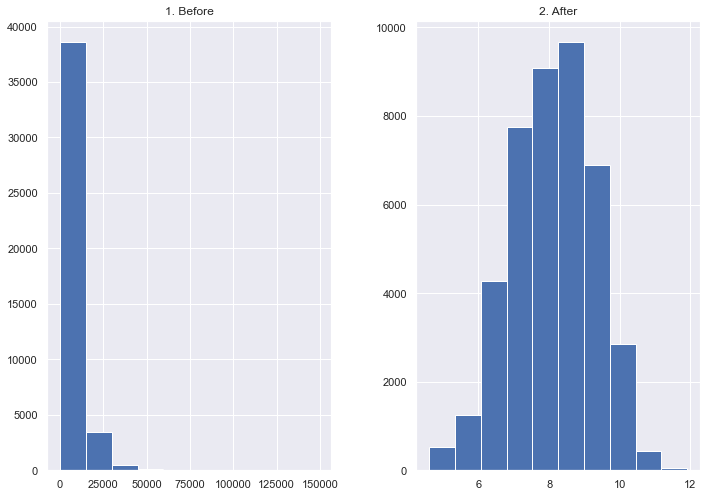

In [87]:
# Plotting the variable price
prices = pd.DataFrame({"1. Before":y2, "2. After":np.log(y2)})
prices.hist()

In [88]:
# Transforming price as a logarithmic value
y2 = np.log(y2)

In [89]:
# Splitting data into test and train
X_train1, X_test1, y_train1, y_test1 = train_test_split(x2, y2, test_size=0.3, random_state = 3)
print(X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape)

(29940, 303) (12832, 303) (29940,) (12832,)


**BASELINE MODEL FOR IMPUTED DATA**

We are making a base model by using test data mean value.
This is to set a benchmark and to compare with our regression model.

In [90]:
# finding the mean for test data value
base_pred = np.mean(y_test1)
print(base_pred)

8.068391740519193


In [91]:
# Repeating same value till length of test data
base_pred = np.repeat(base_pred, len(y_test1))

In [92]:
# finding the RMSE
base_root_mean_square_error_imputed = np.sqrt(mean_squared_error(y_test1, base_pred))
print(base_root_mean_square_error_imputed)

1.1884349112889792


**LINEAR REGRESSION WITH IMPUTED DATA**

In [93]:
# Setting intercept as true
lgr2=LinearRegression(fit_intercept=True)

In [94]:
# Model
model_lin2=lgr2.fit(X_train1,y_train1)

In [95]:
# Predicting model on test set
cars_predictions_lin2 = lgr2.predict(X_test1)

In [96]:
# Computing MSE and RMSE
lin_mse2 = mean_squared_error(y_test1, cars_predictions_lin2)
lin_rmse2 = np.sqrt(lin_mse2)
print(lin_rmse2)

0.6483956449231303


In [97]:
# R squared value
r2_lin_test2=model_lin2.score(X_test1,y_test1)
r2_lin_train2=model_lin2.score(X_train1,y_train1)
print(r2_lin_test2,r2_lin_train2)

0.7023339008631179 0.7071658736894362


**RANDOM FOREST WITH IMPUTED DATA**

In [98]:
# Model parameters
rf2 = RandomForestRegressor(n_estimators = 100,max_features='auto',max_depth=100,min_samples_split=10,min_samples_leaf=4,random_state=1)

In [99]:
# Model
model_rf2=rf2.fit(X_train1,y_train1)

In [100]:
# Predicting model on test set
cars_predictions_rf2 = rf2.predict(X_test1)

In [101]:
# Computing MSE and RMSE
rf_mse2 = mean_squared_error(y_test1, cars_predictions_rf2)
rf_rmse2 = np.sqrt(rf_mse2)
print(rf_rmse2)

0.494313994408829


In [102]:
# R squared value
r2_rf_test2=model_rf2.score(X_test1,y_test1)
r2_rf_train2=model_rf2.score(X_train1,y_train1)
print(r2_rf_test2,r2_rf_train2) 

0.8269964521311131 0.9024289431669166


**FINAL OUTPUT :**

In [103]:
print("Metrics for models built from data where missing values were omitted")
print("R squared value for train from Linear Regression=  %s"% r2_lin_train1)
print("R squared value for test from Linear Regression=  %s"% r2_lin_test1)
print("R squared value for train from Random Forest=  %s"% r2_rf_train1)
print("R squared value for test from Random Forest=  %s"% r2_rf_test1)
print("Base RMSE of model built from data where missing values were omitted= %s"%base_root_mean_square_error)
print("RMSE value for test from Linear Regression=  %s"% lin_rmse1)
print("RMSE value for test from Random Forest=  %s"% rf_rmse1)
print("\n\n")
print("Metrics for models built from data where missing values were imputed")
print("R squared value for train from Linear Regression=  %s"% r2_lin_train2)
print("R squared value for test from Linear Regression=  %s"% r2_lin_test2)
print("R squared value for train from Random Forest=  %s"% r2_rf_train2)
print("R squared value for test from Random Forest=  %s"% r2_rf_test2)
print("Base RMSE of model built from data where missing values were imputed= %s"%base_root_mean_square_error_imputed)
print("RMSE value for test from Linear Regression=  %s"% lin_rmse2)
print("RMSE value for test from Random Forest=  %s"% rf_rmse2)

Metrics for models built from data where missing values were omitted
R squared value for train from Linear Regression=  0.7800936978183916
R squared value for test from Linear Regression=  0.7658615091649252
R squared value for train from Random Forest=  0.9202494705146291
R squared value for test from Random Forest=  0.8504018147750623
Base RMSE of model built from data where missing values were omitted= 1.1274483657478247
RMSE value for test from Linear Regression=  0.5455481266513831
RMSE value for test from Random Forest=  0.4360736289370223



Metrics for models built from data where missing values were imputed
R squared value for train from Linear Regression=  0.7071658736894362
R squared value for test from Linear Regression=  0.7023339008631179
R squared value for train from Random Forest=  0.9024289431669166
R squared value for test from Random Forest=  0.8269964521311131
Base RMSE of model built from data where missing values were imputed= 1.1884349112889792
RMSE value for te

**Linear Regression VS Random Forest:**

The best model for predicting price for pre-owned cars is RANDOM FOREST (by omitted missing data) with RMSE value for test from Random Forest to be 0.4360736289370223 .
